In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcard-data/README.md
/kaggle/input/creditcard-data/Creditcard_data.csv
/kaggle/input/creditcard-data/Sampling_Assignment.pdf


In [133]:
data=pd.read_csv("/kaggle/input/creditcard-data/Creditcard_data.csv")

In [134]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [135]:
x=data[data.columns[:-1]]
y=data[data.columns[30]]
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [136]:
# class count
def Counter(data):
    class_count_0, class_count_1 = data['Class'].value_counts()

    # Separate class
    class_0 = data[data['Class'] == 0]
    class_1 = data[data['Class'] == 1]# print the shape of the class
    print('class 0:', class_0.shape)
    print('class 1:', class_1.shape)
Counter(data)
class_count_0, class_count_1 = data['Class'].value_counts()
# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (763, 31)
class 1: (9, 31)
class 0: (763, 31)
class 1: (9, 31)


total class of 1 and0: 0    9
1    9
Name: Class, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

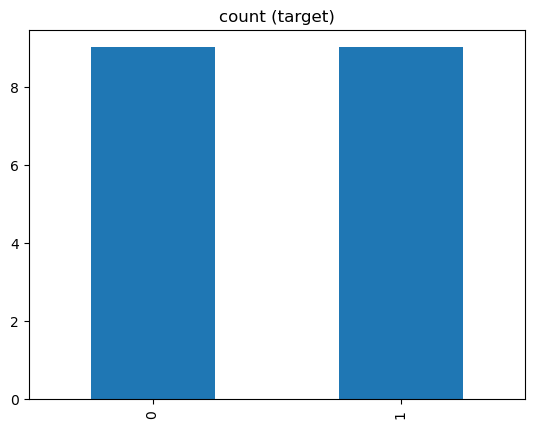

In [137]:
# Random Undersampling 
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_under['Class'].value_counts().plot(kind='bar', title='count (target)')

total class of 1 and 0: 1    763
0    763
Name: Class, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

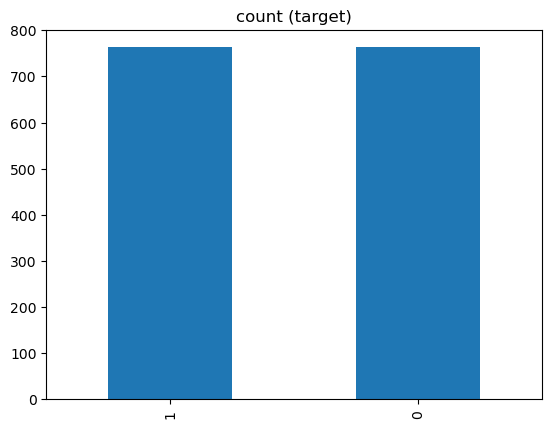

In [138]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['Class'].value_counts())# plot the count after under-sampeling
test_over['Class'].value_counts().plot(kind='bar', title='count (target)')

In [139]:
data_under_random=test_under
Counter(data_under_random)
data_over_random=test_over
Counter(data_over_random)

class 0: (9, 31)
class 1: (9, 31)
class 0: (763, 31)
class 1: (763, 31)


In [140]:
x_under_random=data_under_random[data_under_random.columns[:-1]]
y_under_random=data_under_random[data_under_random.columns[30]]
x_under_random.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
592,443,-0.644712,0.662711,1.488931,1.299353,0.091519,0.195377,0.469805,0.298436,-0.419328,...,0.198551,0.054276,0.326933,-0.008162,0.203424,-0.159352,-0.250928,0.400740,0.199970,46.77
358,265,-0.293839,-0.044369,1.093146,-1.576473,-0.107492,-0.791217,0.291465,-0.093164,-1.406366,...,-0.451588,-0.235571,-0.286207,0.069303,0.107632,-0.385142,0.866055,-0.017603,0.039893,24.84
91,60,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,...,-0.001998,0.115775,0.164781,-0.177564,0.391891,0.624682,-0.288376,-0.001312,0.035812,89.40
693,524,-0.795322,0.081238,2.210568,0.268145,-0.506875,-0.303840,-0.180829,0.085540,0.248346,...,0.054227,0.210198,0.869922,-0.118656,0.744594,-0.504294,1.259841,0.014692,0.128346,37.89
51,36,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,-0.001980,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95


In [141]:
from sklearn.model_selection import train_test_split

x_urandom_train,x_urandom_test,y_urandom_train,y_urandom_test = train_test_split(x_under_random,y_under_random,test_size=0.2)

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_urandom_train, y_urandom_train)

# predict
rfc_predict = rfc.predict(x_urandom_test)# check performance
print('ROCAUC score:',roc_auc_score(y_urandom_test, rfc_predict))
random_u_rfc_acc=accuracy_score(y_urandom_test, rfc_predict)
print('Accuracy score:',random_u_rfc_acc)
print('F1 score:',f1_score(y_urandom_test, rfc_predict))

ROCAUC score: 0.6666666666666667
Accuracy score: 0.5
F1 score: 0.5


In [143]:
x_over_random=data_over_random[data_over_random.columns[:-1]]
y_over_random=data_over_random[data_over_random.columns[30]]
x_over_random.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
182,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.079756,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69
766,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.073779,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29
182,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.079756,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00


In [144]:
from sklearn.model_selection import train_test_split

x_orandom_train,x_orandom_test,y_orandom_train,y_orandom_test = train_test_split(x_over_random,y_over_random,test_size=0.2,random_state = 42)

In [214]:
rfc = RandomForestClassifier()

# data=x_orandom_train
# data["Class"]=y_orandom_train
# Counter(data)
# fit the predictor and target
rfc.fit(x_orandom_train, y_orandom_train)

# predict
rfc_predict = rfc.predict(x_orandom_test)# check performance
print('ROCAUC score:',roc_auc_score(y_orandom_test, rfc_predict))
random_o_rfc_acc=accuracy_score(y_orandom_test, rfc_predict)
print('Accuracy score:',random_o_rfc_acc)
print('F1 score:',f1_score(y_orandom_test, rfc_predict))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


In [146]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', y.shape)
print('Resample dataset shape', y_smote.shape)

Original dataset shape (772,)
Resample dataset shape (1526,)


In [147]:
data_over_smote=x_smote
data_over_smote["Class"]=y_smote
Counter(data_over_smote)

class 0: (763, 31)
class 1: (763, 31)


In [148]:
from sklearn.model_selection import train_test_split

x_smote_train,x_smote_test,y_smote_train,y_smote_test = train_test_split(x_smote,y_smote,test_size=0.35)

In [215]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_smote_train, y_smote_train)

# predict
rfc_predict = rfc.predict(x_smote_test)# check performance
print('ROCAUC score:',roc_auc_score(y_smote_test, rfc_predict))
smote_rfc_acc=accuracy_score(y_smote_test, rfc_predict)
print('Accuracy score:',smote_rfc_acc)
print('F1 score:',f1_score(y_smote_test, rfc_predict))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


In [150]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(x, y)

print('Original dataset shape',y.shape)
print('Resample dataset shape', y_tl.shape)

Original dataset shape (772,)
Resample dataset shape (765,)


In [151]:
data_under_tl=x_tl
data_under_tl["Class"]=y_tl
Counter(data_under_tl)

class 0: (756, 31)
class 1: (9, 31)


In [152]:
x_tl_train,x_tl_test,y_tl_train,y_tl_test = train_test_split(x_tl,y_tl,test_size=0.2)

In [216]:
# fit the predictor and target
rfc.fit(x_tl_train, y_tl_train)

# predict
rfc_predict = rfc.predict(x_tl_test)# check performance
print('ROCAUC score:',roc_auc_score(y_tl_test, rfc_predict))
tl_rfc_acc=accuracy_score(y_tl_test, rfc_predict)
print('Accuracy score:',tl_rfc_acc)
print('F1 score:',f1_score(y_tl_test, rfc_predict))

ROCAUC score: 0.75
Accuracy score: 0.9934640522875817
F1 score: 0.6666666666666666


In [154]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', y.shape)
print('Resample dataset shape:', y_nm.shape)

Original dataset shape: (772,)
Resample dataset shape: (18,)


In [155]:
x_nm_train,x_nm_test,y_nm_train,y_nm_test = train_test_split(x_nm,y_nm,test_size=0.2)

In [218]:
rfc.fit(x_nm_train, y_nm_train)

# predict
rfc_predict = rfc.predict(x_nm_test)# check performance
print('ROCAUC score:',roc_auc_score(y_nm_test, rfc_predict))
nm_rfc_acc=accuracy_score(y_nm_test,rfc_predict)
print('Accuracy score:',nm_rfc_acc)
print('F1 score:',f1_score(y_nm_test, rfc_predict))

ROCAUC score: 0.6666666666666666
Accuracy score: 0.5
F1 score: 0.5


In [157]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 8, min_samples_leaf = 5)



In [219]:
clf_entropy.fit(x_urandom_train, y_urandom_train)
clf_predict=clf_entropy.predict(x_urandom_test)
print('ROCAUC score:',roc_auc_score(y_urandom_test, clf_predict))
random_u_dtc_acc=accuracy_score(y_urandom_test, clf_predict)
print('Accuracy score:',random_u_dtc)
print('F1 score:',f1_score(y_urandom_test, clf_predict))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


In [220]:
clf_entropy.fit(x_orandom_train, y_orandom_train)
clf_predict=clf_entropy.predict(x_orandom_test)
print('ROCAUC score:',roc_auc_score(y_orandom_test, clf_predict))
random_o_dtc_acc=accuracy_score(y_orandom_test, clf_predict)
print('Accuracy score:',random_o_dtc)
print('F1 score:',f1_score(y_orandom_test, clf_predict))

ROCAUC score: 0.9846625766871165
Accuracy score: 0.9836601307189542
F1 score: 0.9828178694158076


In [222]:
clf_entropy.fit(x_tl_train, y_tl_train)
clf_predict=clf_entropy.predict(x_tl_test)
print('ROCAUC score:',roc_auc_score(y_tl_test, clf_predict))
tl_dtc_acc=accuracy_score(y_tl_test, clf_predict)
print('Accuracy score',tl_dct_acc)
print('F1 score:',f1_score(y_tl_test, clf_predict))

ROCAUC score: 1.0
Accuracy score 1.0
F1 score: 1.0


In [223]:
clf_entropy.fit(x_smote_train, y_smote_train)
clf_predict=clf_entropy.predict(x_smote_test)
print('ROCAUC score:',roc_auc_score(y_smote_test, clf_predict))
smote_dtc_acc=accuracy_score(y_smote_test, clf_predict)
print('Accuracy score:',smote_dtc_acc)
print('F1 score:',f1_score(y_smote_test, clf_predict))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


In [224]:
clf_entropy.fit(x_nm_train, y_nm_train)
clf_predict=clf_entropy.predict(x_nm_test)
print('ROCAUC score:',roc_auc_score(y_nm_test, clf_predict))
nm_dtc_acc=accuracy_score(y_nm_test, clf_predict)
print('Accuracy score:',nm_dtc_acc)
print('F1 score:',f1_score(y_nm_test, clf_predict))

ROCAUC score: 0.6666666666666666
Accuracy score: 0.5
F1 score: 0.5


In [163]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=100000)

In [225]:
lr.fit(x_urandom_train, y_urandom_train)
lr_predict=lr.predict(x_urandom_test)
print('ROCAUC score:',roc_auc_score(y_urandom_test, lr_predict))
urandom_lr_acc=accuracy_score(y_urandom_test, lr_predict)
print('Accuracy score:',urandom_lr_acc)
print('F1 score:',f1_score(y_urandom_test, lr_predict))

ROCAUC score: 0.8333333333333334
Accuracy score: 0.75
F1 score: 0.6666666666666666


In [226]:
lr.fit(x_orandom_train, y_orandom_train)
lr_predict=clf_entropy.predict(x_orandom_test)
print('ROCAUC score:',roc_auc_score(y_orandom_test, lr_predict))
orandom_lr_acc=accuracy_score(y_orandom_test, lr_predict)
print('Accuracy score:',orandom_lr_acc)
print('F1 score:',f1_score(y_orandom_test, lr_predict))

ROCAUC score: 0.4179930498948904
Accuracy score: 0.39869281045751637
F1 score: 0.5257731958762886


In [227]:
lr.fit(x_tl_train, y_tl_train)
lr_predict=lr.predict(x_tl_test)
print('ROCAUC score:',roc_auc_score(y_tl_test, lr_predict))
tl_lr_acc=accuracy_score(y_tl_test, lr_predict)
print('Accuracy score:',tl_lr_acc)
print('F1 score:',f1_score(y_tl_test, lr_predict))

ROCAUC score: 0.4966887417218543
Accuracy score: 0.9803921568627451
F1 score: 0.0


In [228]:
clf_entropy.fit(x_smote_train, y_smote_train)
clf_predict=clf_entropy.predict(x_smote_test)
print('ROCAUC score:',roc_auc_score(y_smote_test, clf_predict))
smote_lr_acc=accuracy_score(y_smote_test, clf_predict)
print('Accuracy score:',smote_lr_acc)
print('F1 score:',f1_score(y_smote_test, clf_predict))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


In [229]:
lr.fit(x_nm_train, y_nm_train)
lr_predict=lr.predict(x_nm_test)
print('ROCAUC score:',roc_auc_score(y_nm_test, lr_predict))
nm_lr_acc=accuracy_score(y_nm_test, lr_predict)
print('Accuracy score:',nm_lr_acc)
print('F1 score:',f1_score(y_nm_test, lr_predict))

ROCAUC score: 0.3333333333333333
Accuracy score: 0.5
F1 score: 0.6666666666666666


In [169]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [230]:
knn.fit(x_urandom_train, y_urandom_train)
knn_predict=knn.predict(x_urandom_test)
print('ROCAUC score:',roc_auc_score(y_urandom_test, knn_predict))
urandom_knn_acc=accuracy_score(y_urandom_test, knn_predict)
print('Accuracy score:',urandom_knn_acc)
print('F1 score:',f1_score(y_urandom_test, knn_predict))

ROCAUC score: 0.6666666666666667
Accuracy score: 0.5
F1 score: 0.5


In [231]:
knn.fit(x_orandom_train, y_orandom_train)
knn_predict=knn.predict(x_orandom_test)
print('ROCAUC score:',roc_auc_score(y_orandom_test, knn_predict))
orandom_knn_acc=accuracy_score(y_orandom_test, knn_predict)
print('Accuracy score:',orandom_knn_acc)
print('F1 score:',f1_score(y_orandom_test, knn_predict))

ROCAUC score: 0.9785276073619632
Accuracy score: 0.9771241830065359
F1 score: 0.9761092150170648


In [232]:
knn.fit(x_tl_train, y_tl_train)
knn_predict=knn.predict(x_tl_test)
print('ROCAUC score:',roc_auc_score(y_tl_test, knn_predict))
tl_knn_acc=accuracy_score(y_tl_test, knn_predict)
print('Accuracy score:',tl_knn_acc)
print('F1 score:',f1_score(y_tl_test, knn_predict))

ROCAUC score: 0.5
Accuracy score: 0.9869281045751634
F1 score: 0.0


In [233]:
knn.fit(x_smote_train, y_smote_train)
knn_predict=knn.predict(x_smote_test)
print('ROCAUC score:',roc_auc_score(y_smote_test, knn_predict))
smote_knn_acc=accuracy_score(y_smote_test, knn_predict)
print('Accuracy score:',smote_knn_acc)
print('F1 score:',f1_score(y_smote_test, knn_predict))

ROCAUC score: 0.827848915231492
Accuracy score: 0.8261682242990654
F1 score: 0.8399311531841652


In [234]:
knn.fit(x_nm_train, y_nm_train)
knn_predict=knn.predict(x_nm_test)
print('ROCAUC score:',roc_auc_score(y_nm_test, knn_predict))
nm_knn_acc=accuracy_score(y_nm_test, knn_predict)
print('Accuracy score:',nm_knn_acc)
print('F1 score:',f1_score(y_nm_test, knn_predict))

ROCAUC score: 0.6666666666666666
Accuracy score: 0.5
F1 score: 0.5


In [174]:
from sklearn.svm import SVC  
svc = SVC(kernel='linear')

In [206]:
svc.fit(x_urandom_train, y_urandom_train)
svc_predict=svc.predict(x_urandom_test)
print('ROCAUC score:',roc_auc_score(y_urandom_test, svc_predict))
urandom_svc_acc=accuracy_score(y_urandom_test, svc_predict)
print('Accuracy score:',urandom_svc_acc)
print('F1 score:',f1_score(y_urandom_test, svc_predict))

ROCAUC score: 0.8333333333333334
Accuracy score: 0.75
F1 score: 0.6666666666666666


In [207]:
svc.fit(x_orandom_train, y_orandom_train)
svc_predict=svc.predict(x_orandom_test)
print('ROCAUC score:',roc_auc_score(y_orandom_test, svc_predict))
orandom_svc_acc=accuracy_score(y_orandom_test, svc_predict)
print('Accuracy score:',orandom_svc_acc)
print('F1 score:',f1_score(y_orandom_test, svc_predict))

ROCAUC score: 0.9355828220858895
Accuracy score: 0.9313725490196079
F1 score: 0.9315960912052117


In [208]:
svc.fit(x_tl_train, y_tl_train)
svc_predict=svc.predict(x_tl_test)
print('ROCAUC score:',roc_auc_score(y_tl_test, svc_predict))
tl_svc_acc=accuracy_score(y_tl_test, svc_predict)
print('Accuracy score:',tl_svc_acc)
print('F1 score:',f1_score(y_tl_test, svc_predict))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


In [209]:
svc.fit(x_smote_train, y_smote_train)
svc_predict=svc.predict(x_smote_test)
print('ROCAUC score:',roc_auc_score(y_smote_test, svc_predict))
smote_svc_acc=accuracy_score(y_smote_test, svc_predict)
print('Accuracy score:',smote_svc_acc)
print('F1 score:',f1_score(y_smote_test, svc_predict))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


In [210]:
svc.fit(x_nm_train, y_urandom_train)
svc_predict=svc.predict(x_nm_test)
print('ROCAUC score:',roc_auc_score(y_nm_test, svc_predict))
nm_svc_acc=accuracy_score(y_nm_test, svc_predict)
print('Accuracy score:',nm_svc_acc)
print('F1 score:',f1_score(y_nm_test, svc_predict))

ROCAUC score: 0.3333333333333333
Accuracy score: 0.5
F1 score: 0.6666666666666666


In [235]:
Sres={"Random Under sampling":[random_u_rfc_acc,random_u_dtc_acc,urandom_lr_acc,urandom_knn_acc,urandom_svc_acc],
      "Random Over sampling":[random_o_rfc_acc,random_o_dtc_acc,orandom_lr_acc,orandom_knn_acc,orandom_svc_acc],
      "Near Miss":[nm_rfc_acc,nm_dtc_acc,nm_lr_acc,nm_knn_acc,nm_svc_acc],
      "TomekLinks":[tl_rfc_acc,tl_dtc_acc,tl_lr_acc,tl_knn_acc,tl_svc_acc],
      "SMOTE":[smote_rfc_acc,smote_dtc_acc,smote_lr_acc,smote_knn_acc,smote_svc_acc]}

In [247]:
df = pd.DataFrame(Sres, index = ["Random Forest","Decision Tree","Logistic Regression","KNN","SVM"])
# 

In [248]:
df=df*100
display(df)

,Random Under sampling,Random Over sampling,Near Miss,TomekLinks,SMOTE
Random Forest,50.0,100.000000,50.0,99.346405,100.000000
Decision Tree,100.0,98.366013,50.0,100.000000,100.000000
Logistic Regression,75.0,39.869281,50.0,98.039216,100.000000
KNN,50.0,97.712418,50.0,98.692810,82.616822
SVM,75.0,93.137255,50.0,100.000000,100.000000


In [249]:
display(df.max())

Random Under sampling    100.0
Random Over sampling     100.0
Near Miss                 50.0
TomekLinks               100.0
SMOTE                    100.0
dtype: float64